# Phenomenological model constraining: application

![image.png](../slides/jetset_slides/jetset_slides.025.png)


In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [2]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.3.0rc7


In [3]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[2])


/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv


In [4]:
%matplotlib inline
from jetset.cosmo_tools import Cosmo
c=Cosmo()
sed_data=ObsData(data_table=data,cosmo=c)
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.2,[10.**6,10.**29])



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2
msk [False  True False  True  True  True  True  True False False False  True
 False False False False False False False False False False False False
 False  True  True  True  True  True  True False False False False False
 False False  True  True  True  True False  True  True  True  True  True
  True False  True False False False False False False False False False
 False False False False False False  True False  True False  True False
  True False  True False  True False False False False False  True  True
  True  True  True  True  True False]



In [5]:
sed_data.save('Mrk_501.pkl')

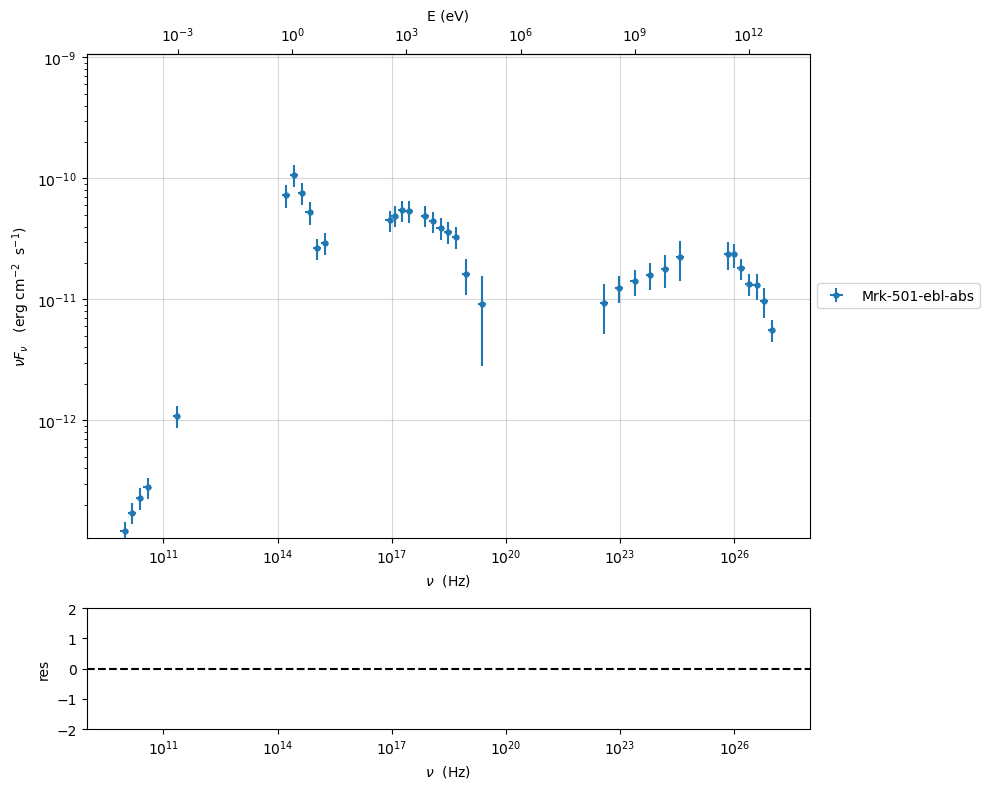

In [6]:
p=sed_data.plot_sed()


*** evaluating spectral indices for data ***



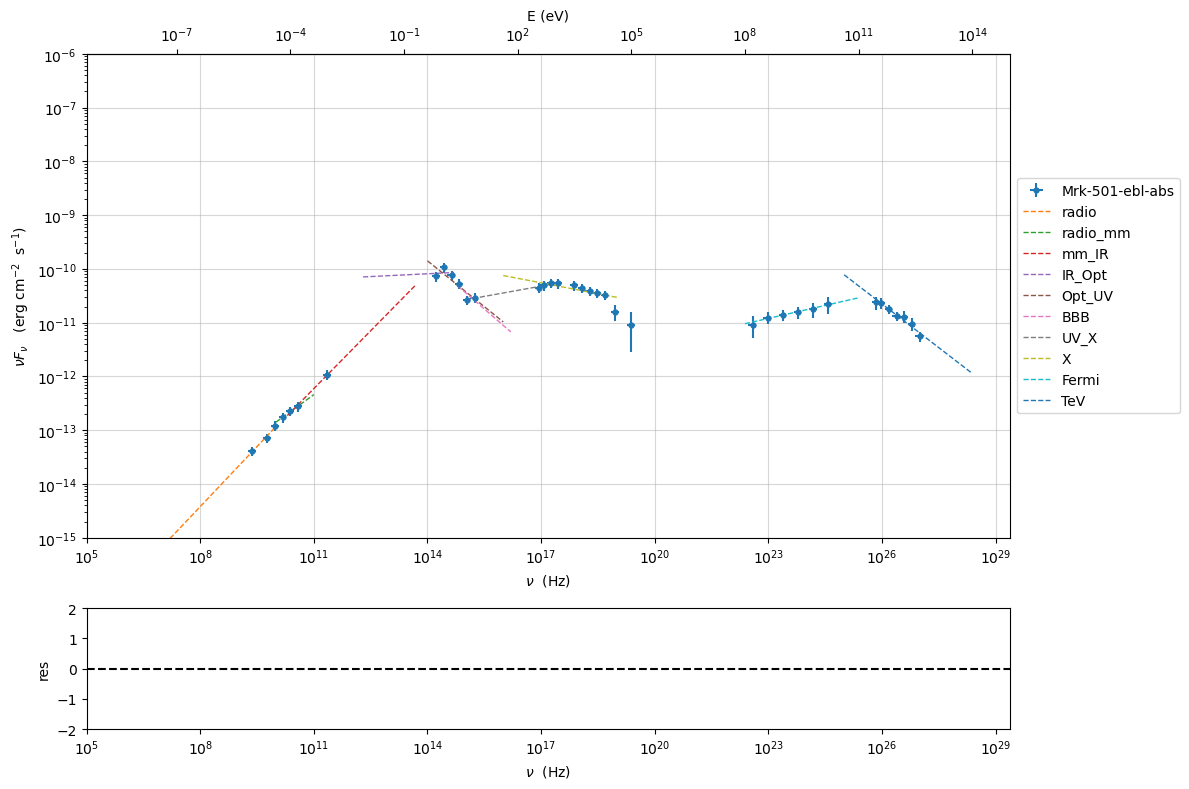

In [7]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices()
p=my_shape.plot_indices()
p.setlim(y_min=1E-15,y_max=1E-6)


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
====> simplex
====> migrad
====> simplex
====> migrad
====> simplex
====> migrad
---> class:  HSP

====> simplex
====> migrad
====> simplex
====> migrad
====> simplex
====> migrad
---> class:  HSP




model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-7.213716e-02,-7.213716e-02,1.339097e-02,--,-5.519776e-02,-1.000000e+01,0.000000e+00,False
LogCubic,c,-2.760462e-03,-2.760462e-03,2.010488e-03,--,4.628271e-03,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.696716e+01,1.696716e+01,1.472490e-01,--,1.591347e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.029016e+01,-1.029016e+01,3.628120e-02,--,-1.019697e+01,-3.000000e+01,0.000000e+00,False
host_galaxy,nuFnu_p_host,-1.009709e+01,-1.009709e+01,6.789409e-02,--,-1.019697e+01,-1.219697e+01,-8.196966e+00,False
host_galaxy,nu_scale,1.730798e-02,1.730798e-02,1.787557e-04,--,0.000000e+00,-5.000000e-01,5.000000e-01,False


---> sync       nu_p=+1.696716e+01 (err=+1.472490e-01)  nuFnu_p=-1.029016e+01 (err=+3.628120e-02) curv.=-7.213716e-02 (err=+1.339097e-02)



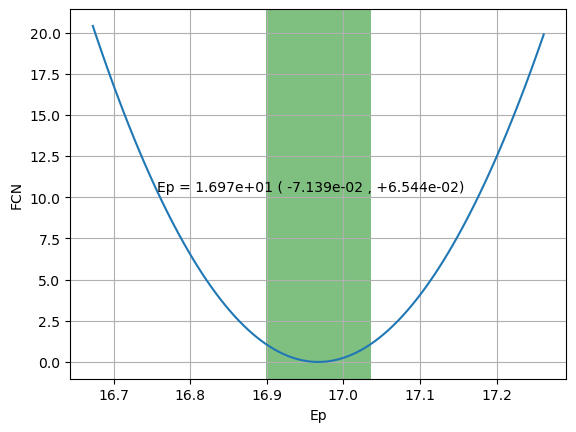

In [8]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='minuit',
                  silent=True,
                  fit_range=[10,21])

try:
    x,y,z,fig,ax=mm.minimizer.draw_contour('Ep','b')
except:
    pass

try:
    x,y,fig,ax=mm.minimizer.draw_profile('Ep')
except:
    pass


In [9]:
help(mm.minimizer.minos_errors)

Help on method minos_errors in module jetset.minimizer:

minos_errors(par=None) method of jetset.minimizer.MinuitMinimizer instance




*** Log-Polynomial fitting of the IC component ***
---> fit range: [21, 29]
---> LogCubic fit
-------------------------------------------------------------------------
Fit report

Model: IC-shape-fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
LogCubic,b,curvature,,-1.552140e-01,-1.000000e+01,0.000000e+00,False,False
LogCubic,c,third-degree,,-3.792906e-02,-1.000000e+01,1.000000e+01,False,False
LogCubic,Ep,peak freq,Hz,2.526850e+01,0.000000e+00,3.000000e+01,True,False
LogCubic,Sp,peak flux,erg / (s cm2),-1.057441e+01,-3.000000e+01,0.000000e+00,True,False



converged=True
calls=261
mesg=


'`ftol` termination condition is satisfied.'

dof=9
chisq=1.362624, chisq/red=0.151403 null hypothesis sig=0.998043

stats without the UL
dof  UL=9
chisq=1.362624, chisq/red=0.151403 null hypothesis sig=0.998043


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.552140e-01,-1.552140e-01,1.002820e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-3.792906e-02,-3.792906e-02,4.394177e-03,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.526850e+01,2.526850e+01,4.574679e-02,--,2.526355e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.057441e+01,-1.057441e+01,1.597434e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


-------------------------------------------------------------------------





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.552140e-01,-1.552140e-01,1.002820e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-3.792906e-02,-3.792906e-02,4.394177e-03,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.526850e+01,2.526850e+01,4.574679e-02,--,2.526355e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.057441e+01,-1.057441e+01,1.597434e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> IC         nu_p=+2.526850e+01 (err=+4.574679e-02)  nuFnu_p=-1.057441e+01 (err=+1.597434e-02) curv.=-1.552140e-01 (err=+1.002820e-02)



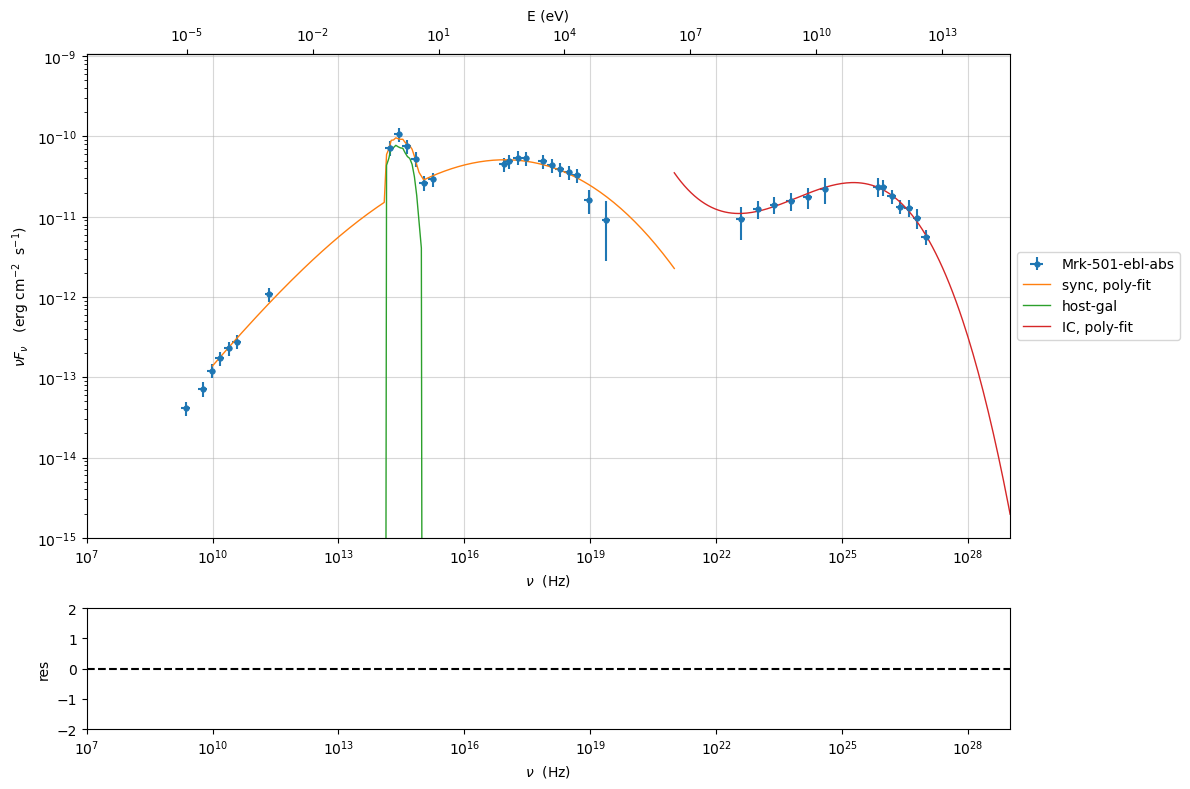

In [10]:
my_shape.IC_fit(fit_range=[21,29],minimizer='lsb')
p=my_shape.plot_shape_fit()
p.setlim(y_min=1E-15,x_min=1E7,x_max=1E29)

In [11]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=15,
                        B_range=[0.01,0.1],
                        distr_e='lppl',
                        t_var_sec=1*86400,
                        nu_cut_IR=5E10,
                        SEDShape=my_shape)


jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=True,silent=False)


***  constrains parameters from observable ***


---> ***  emitting region parameters  ***
===> setting C threads to 12

---> setting par type redshift, corresponding to par z_cosm

---> setting par type magnetic_field, corresponding to par B=5.500000e-02

---> setting par type region_size, corresponding to par R=3.759008e+16
---> completed True


---> *** electron distribution parameters ***
---> emitters distribution spectral type lp
---> emitters distribution name lppl

---> r elec. spec. curvature =3.606858e-01
---> setting par type curvature, corresponding to par r

---> s_radio_mm -0.4883795409812349 1.9767590819624699
---> s_X 3.2701902417476614
---> s_Fermi 1.742749326553211
---> s_UV_X 2.7453721195379277
---> s_Opt_UV -1.5681956535053265 4.136391307010653
---> s from synch log-log fit -1.0
---> s from (s_Fermi + s_UV)/2
---> power-law index s, class obj=HSP s chosen is 2.244061
---> setting par type LE_spectral_slope, corresponding to par s
---> task completed True

---> sett

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,4.264578e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,3.371158e-02,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.220625e+00,0.000000e+00,9.000000e+00,True,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,6.562426e+00,0.000000e+00,1.500000e+01,True,False
jet_leptonic,N,emitters_density,1 / cm3,4.668962e+00,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.306800e+00,0.000000e+00,9.000000e+00,True,False


eval_model




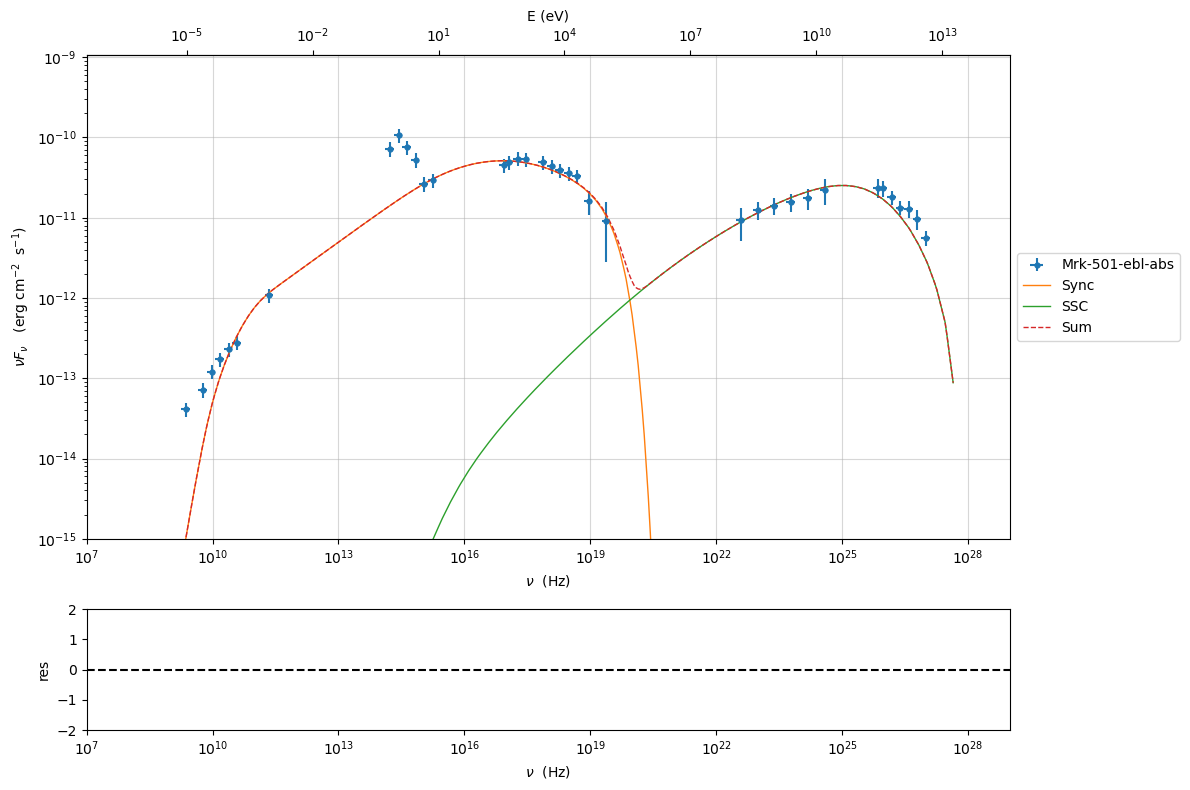

In [12]:
pl=jet.plot_model(sed_data=sed_data)
pl.setlim(y_min=1E-15,x_min=1E7,x_max=1E29)
jet.save_model('constrained_jet.pkl')